In [1]:
# import python libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt  # For visualizations

In [2]:
# model hyper-parameters
num_epochs = 10
LR = 0.005

In [3]:
# class to handle callback
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.1:
            print("\nReached accuracy > 60%, so terminating training")
            self.model.stop_training=True

In [4]:
callbacks = myCallback()  # create callback object

In [5]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Size of training set:', len(training_images))
print('Size of test set:', len(test_images))

Size of training set: 60000
Size of test set: 10000


In [6]:
# reshape and scale images to [0 <-> 1]
training_images = training_images.reshape(len(training_images), len(training_images[0]), len(training_images[0][0]), 1)
training_images = training_images/255.
test_images = test_images.reshape(len(test_images), len(test_images[0]), len(test_images[0][0]), 1)
test_images = test_images/255.
print('Shape of training set:', np.shape(training_images))
print('Shape of test set:', np.shape(test_images))

Shape of training set: (60000, 28, 28, 1)
Shape of test set: (10000, 28, 28, 1)


In [7]:
# define model
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
# build the model by compiling it with optimizer and loss function
model.compile(loss='sparse_categorical_crossentropy',
optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=LR))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [9]:
# train model
model.fit(training_images, training_labels, epochs=num_epochs, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 42s 704us/sample - loss: 0.4160
Epoch 2/10
60000/60000 [==============================] - 43s 718us/sample - loss: 0.3068
Epoch 3/10
60000/60000 [==============================] - 44s 729us/sample - loss: 0.2733
Epoch 4/10
60000/60000 [==============================] - 44s 725us/sample - loss: 0.2532
Epoch 5/10
60000/60000 [==============================] - 38s 639us/sample - loss: 0.2371
Epoch 6/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2221
Epoch 7/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.2123
Epoch 8/10
60000/60000 [==============================] - 38s 630us/sample - loss: 0.2019
Epoch 9/10
60000/60000 [==============================] - 37s 624us/sample - loss: 0.1928
Epoch 10/10
60000/60000 [==============================] - 37s 621us/sample - loss: 0.1863


In [10]:
# evaluate model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 149us/sample - loss: 0.3592


0.359235534709692

In [11]:
# check first 25 labels
print(test_labels[:50])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


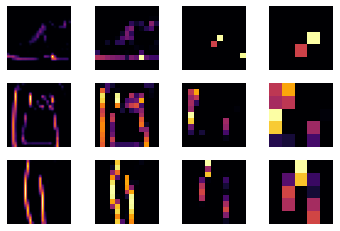

In [43]:
# visualize convolutions and pooling
first_image = 0
second_image = 1
third_image = 2
convolution_number = 15  # filter number

f, axarr = plt.subplots(3,4)
# keras API creates a list of each layers output 
layer_outputs = [layer.output for layer in model.layers]
# treat each item/neuron in the layer as an individual activation model
activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
for x in range(4):
    # first image model layers outputs
    f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number], cmap='inferno')
    axarr[0,x].grid(False)
    axarr[0,x].axis('off')
    # second image model layers outputs
    f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number], cmap='inferno')
    axarr[1,x].grid(False)
    axarr[1,x].axis('off')
    # third image model layers outputs
    f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number], cmap='inferno')
    axarr[2,x].grid(False)
    axarr[2,x].axis('off')